In [2]:
# Declaración de librerías:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

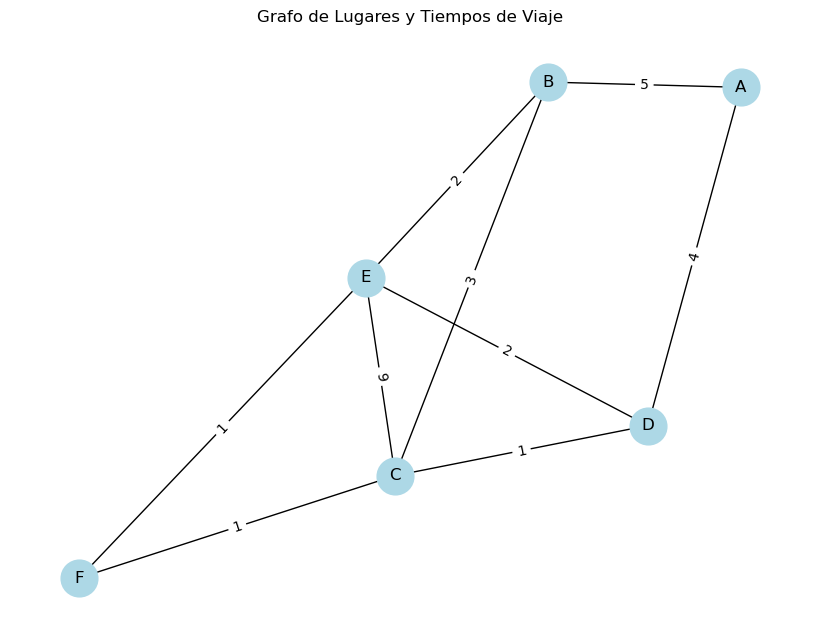

In [13]:
# Crear el grafo
G = nx.Graph()
G.add_edge('A', 'B', weight=5)
G.add_edge('B', 'C', weight=3)
G.add_edge('A', 'D', weight=4)
G.add_edge('D', 'E', weight=2)
G.add_edge('C', 'E', weight=9)
G.add_edge('B', 'E', weight=2)
G.add_edge('C', 'D', weight=1)
G.add_edge('C', 'F', weight=1)
G.add_edge('F', 'E', weight=1)

# Visualizar el grafo
pos = nx.spring_layout(G)  # Genera posiciones de los nodos.
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo de Lugares y Tiempos de Viaje")
plt.show()

In [28]:
# Algoritmo de Greedy Search
def calcular_tiempo_minimo(graph, start, goal):
    visited = set([start])
    queue = [(0, start, [start])]
    
    while queue:
        _, current, path = heapq.heappop(queue)

        print("------------------------")
        print("Nodo actual:", current)
        print("Nodo path:", path)
        print("Visitados:")
        
        if current == goal:
            return path
        
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                tiempo_estimado = graph[current][neighbor]['weight']
                heapq.heappush(queue, (tiempo_estimado, neighbor, path + [neighbor]))
                print(neighbor, tiempo_estimado)
                print(queue)
    
    return None

In [29]:
# Encontrar el camino usando el algoritmo greedy
start = 'A'
goal = 'E'
path = calcular_tiempo_minimo(G, start, goal)
print("Camino encontrado:", path)

------------------------
Nodo actual: A
Nodo path: ['A']
Visitados:
B 5
[(5, 'B', ['A', 'B'])]
D 4
[(4, 'D', ['A', 'D']), (5, 'B', ['A', 'B'])]
------------------------
Nodo actual: D
Nodo path: ['A', 'D']
Visitados:
E 2
[(2, 'E', ['A', 'D', 'E']), (5, 'B', ['A', 'B'])]
C 1
[(1, 'C', ['A', 'D', 'C']), (5, 'B', ['A', 'B']), (2, 'E', ['A', 'D', 'E'])]
------------------------
Nodo actual: C
Nodo path: ['A', 'D', 'C']
Visitados:
F 1
[(1, 'F', ['A', 'D', 'C', 'F']), (5, 'B', ['A', 'B']), (2, 'E', ['A', 'D', 'E'])]
------------------------
Nodo actual: F
Nodo path: ['A', 'D', 'C', 'F']
Visitados:
------------------------
Nodo actual: E
Nodo path: ['A', 'D', 'E']
Visitados:
Camino encontrado: ['A', 'D', 'E']
